# BUILDING THE MODEL TO FORECAST THE UPCOMING TOTAL NO
# OF CONFIRMED CASES IN NEXT 10 DAYS


In [50]:
import pandas as pd
import numpy as np
import random
import math
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline

In [51]:
conf_case=pd.read_csv("D:\\RStudio\\mini COVID\\MODEL FOR COVID\\DATA SET UPDATED\\cleaned/time_series_covid_19_confirmed_US.csv")

In [52]:
death_case=pd.read_csv("D:\\RStudio\\mini COVID\\MODEL FOR COVID\\DATA SET UPDATED\\cleaned/time_series_covid_19_deaths_US.csv")

In [53]:
print("---------------------------------------------------")
print("\nDIMENSION OF CONFIRMED CASE DATA:",conf_case.shape)
print("---------------------------------------------------")
print("\nDIMENSION OF CONFIRMED CASE DATA:",death_case.shape)

---------------------------------------------------

DIMENSION OF CONFIRMED CASE DATA: (3261, 125)
---------------------------------------------------

DIMENSION OF CONFIRMED CASE DATA: (3261, 126)


In [54]:
#first 10 value
conf_case.head(10)


,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,145,149,149,151,151,151,151,152,152,152
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,14,15,15,15,16,16,19,19,19,19
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,66,66,66,68,68,69,69,69,69,69
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,53,58,61,67,68,74,84,91,93,104
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,189,196,205,208,216,222,224,227,231,243
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,47,47,51,53,58,59,61,67,69,74
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,43,43,44,44,45,46,46,46,46,46
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,40,42,44,44,44,44,45,45,45,45


In [55]:
#first 10 value 
death_case.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,5,5,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,99,99,102,107,108,111,113,114,115,117
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,4,4,4,4,4,4,5,6,6,6
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,3,3,3,4,4,4,4,4,4,4
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,5,5,5,5,5,5,6,7,7,8
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1,1,1,1,1,1,1,1,1,1
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,0,0,0,1,1,1,1,1,1,1
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,0,0,0,0,0,0,0,0,0,0


In [56]:
conf_case.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20',
       '5/12/20', '5/13/20', '5/14/20'],
      dtype='object', length=125)

In [57]:
death_case.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20',
       '5/12/20', '5/13/20', '5/14/20'],
      dtype='object', length=126)

In [58]:
# SVM AND LINEAR REGRESSION FOR PREDTION OF TOTAL NO OF  CONFIRMED CASE 
# MAY COME UP NEXT  DAYS(10)



In [59]:
# EXTRACT all OF THE COLUMN 
cols=conf_case.keys()
cols
#now we have all the column name snd the index of each in the cols


Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20',
       '5/12/20', '5/13/20', '5/14/20'],
      dtype='object', length=125)

In [60]:
#extract only the date from the conf and death case
conf=conf_case.loc[:,cols[11]:cols[-1]]
death=death_case.loc[:,cols[11]:cols[-1]]

In [61]:
print("---------------------------CONFIRMED-----------------------------------")
print("\n")
print(conf.columns)#we need only date date for futher use so extrated
print("\n------------------------------DEATH---------------------------------")
print(death.columns)#we need only date date for futher use so extrated

---------------------------CONFIRMED-----------------------------------


Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20',
       '5/12/20', '5/13/20', '5/14/20'],
      dtype='object', length=114)

------------------------------DEATH---------------------------------
Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20',
       '5/12/20', '5/13/20', '5/14/20'],
      dtype='object', length=114)


In [62]:
#here we have the total date of 114 days
#checking the data of OUT BREAKCASE
conf.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,145,149,149,151,151,151,151,152,152,152
2,0,0,0,0,0,0,0,0,0,0,...,14,15,15,15,16,16,19,19,19,19
3,0,0,0,0,0,0,0,0,0,0,...,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427
4,0,0,0,0,0,0,0,0,0,0,...,66,66,66,68,68,69,69,69,69,69


# finding the total conf case,and death cases and appending to the list

# now since we have the death and confriemed case data we can find the total 
# mortality rare which is the death_sum/conf_sum

In [63]:
dates=conf.keys()
usa_cases=[]
tot_death=[]
mortality_rate=[]

for i in dates:
    conf_sum=conf[i].sum()
    death_sum=death[i].sum()
    tot_death.append(death_sum)
    usa_cases.append(conf_sum)
    mortality_rate.append(death_sum/conf_sum)

In [64]:
#display the new variable
print("\n-----------------------------------------------------------------")
print("\n","THE TOTAL CONFIREMD CASE IS :",conf_sum)
print("\n","THE TOTAL DEATH CASES :",death_sum)
print("\n","THE TOTAL USA CASES GROWTH DATE WISE :",usa_cases)
print("\n-----------------------------------------------------------------")
#list(mortality_rate)



-----------------------------------------------------------------

 THE TOTAL CONFIREMD CASE IS : 1417774

 THE TOTAL DEATH CASES : 85898

 THE TOTAL USA CASES GROWTH DATE WISE : [1, 1, 2, 2, 5, 5, 5, 5, 5, 7, 8, 8, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15, 16, 16, 24, 30, 53, 73, 104, 172, 217, 336, 450, 514, 708, 1105, 1557, 2147, 2857, 2918, 4307, 6096, 8873, 14094, 19403, 25725, 33634, 43663, 53736, 65778, 83836, 101657, 121465, 140909, 161831, 188172, 213242, 243622, 275367, 308650, 336802, 366317, 397121, 428654, 462780, 496535, 526396, 555313, 580619, 607670, 636350, 667592, 699706, 727959, 754376, 779682, 807023, 835150, 869170, 905358, 938154, 965785, 988197, 1012582, 1039909, 1069424, 1103461, 1132539, 1158040, 1180375, 1204351, 1229331, 1257023, 1283929, 1309550, 1329260, 1347881, 1369574, 1390406, 1417774]

-----------------------------------------------------------------


In [65]:
#After 62 DAys there is growth on the confirmed case al most 10000
#IT IS THE array is listed with date wise ALL CONFRIMED CASE

In [66]:
#CONVERTED THE DATE AND THE CASE IN FORM OF NUMPY ARRAY 
date_since_1_22=np.array([i for i in range(len(dates))]).reshape(-1,1)
usa_cases=np.array(usa_cases).reshape(-1,1)
tot_death=np.array(tot_death).reshape(-1,1)


In [67]:
#taking the dATA AFTER THE 101 conf case

u_case=usa_cases[usa_cases>100]
d_sin=date_since_1_22[date_since_1_22>=42]

u_case=np.array(u_case).reshape(-1,1)
d_sin=np.array(d_sin).reshape(-1,1)

print(" TOTAL USA CONF CASE AFTER 101 death: ",len(u_case))
print(len(d_sin))

 TOTAL USA CONF CASE AFTER 101 death:  72
72


In [68]:
date_since_1_22#array of the total days 144 strating from the 1 jan to 14 may

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [69]:
usa_cases#array of total no of case emerge in the usa from the strat date

array([[      1],
       [      1],
       [      2],
       [      2],
       [      5],
       [      5],
       [      5],
       [      5],
       [      5],
       [      7],
       [      8],
       [      8],
       [     11],
       [     11],
       [     11],
       [     11],
       [     11],
       [     11],
       [     11],
       [     11],
       [     12],
       [     12],
       [     13],
       [     13],
       [     13],
       [     13],
       [     13],
       [     13],
       [     13],
       [     13],
       [     15],
       [     15],
       [     15],
       [     15],
       [     15],
       [     15],
       [     16],
       [     16],
       [     24],
       [     30],
       [     53],
       [     73],
       [    104],
       [    172],
       [    217],
       [    336],
       [    450],
       [    514],
       [    708],
       [   1105],
       [   1557],
       [   2147],
       [   2857],
       [   2918],
       [   4307],
       [  

In [70]:
tot_death#array of total no of death_case emerge in the usa from the strat date

array([[    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    0],
       [    1],
       [    1],
       [    6],
       [    7],
       [   11],
       [   12],
       [   14],
       [   17],
       [   21],
       [   22],
       [   28],
       [   32],
       [   41],
       [   50],
       [   56],
       [   70],
       [   98],
       [  132],
       [  189],
       [  267],
       [  363],
       [  453],
       [  596],
       [  781],
       [

In [71]:
#future foescasting for next days
#i have add the 10 days more to the total number of the days
dif=10
future_forecast=np.array([i for i in range(len(dates)+dif)]).reshape(-1,1)
adjusted_dates=future_forecast[:-10]

In [72]:
future_forecast#now it has become 113 to (113+10 days further=123 for future forecasting)

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [73]:
#converting the int value into date time value for better visualization

start='1/22/2020'
start_date=datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
    

In [74]:
future_forecast_dates#printing in the date in the perfect format format 

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [75]:
#visualization with latest date of 14may

latest_conf=conf_case[dates[-1]]
latest_death=death_case[dates[-1]]

In [76]:
latest_conf #last column value for all dataset giving yoiu the conf case across various regiion

0          0
1        152
2         19
3       2427
4         69
        ... 
3256      29
3257      13
3258     187
3259      16
3260     214
Name: 5/14/20, Length: 3261, dtype: int64

In [77]:
latest_death #last column value for all dataset giving yoiu the DEATH case across various regiion

0         0
1         5
2         2
3       117
4         6
       ... 
3256      0
3257      0
3258      3
3259      0
3260      3
Name: 5/14/20, Length: 3261, dtype: int64

In [78]:
#unique regiions or country list 
unique_prov=list(conf_case['Province_State'].unique())
unique_prov

['American Samoa',
 'Guam',
 'Northern Mariana Islands',
 'Puerto Rico',
 'Virgin Islands',
 'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming',
 'Diamond Princess',
 'Grand Princess']

In [79]:
#calu total con case in us
prov_conf_cases=[]
no_cases=[]
for i in unique_prov:
    cases=latest_conf[conf_case['Province_State']==i].sum()
    if cases>0:
        prov_conf_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_prov.remove(i)
    

In [80]:
#now no of case according to the per provi/state/city

for i in range(len(unique_prov)):
    print(f'\t{unique_prov[i]}:\t{prov_conf_cases[i]}  cases')

	Guam:	152  cases
	Northern Mariana Islands:	19  cases
	Puerto Rico:	2427  cases
	Virgin Islands:	69  cases
	Alabama:	11101  cases
	Alaska:	383  cases
	Arizona:	12674  cases
	Arkansas:	4366  cases
	California:	74871  cases
	Colorado:	20838  cases
	Connecticut:	35464  cases
	Delaware:	7223  cases
	District of Columbia:	6736  cases
	Florida:	43210  cases
	Georgia:	35977  cases
	Hawaii:	637  cases
	Idaho:	2351  cases
	Illinois:	87937  cases
	Indiana:	26053  cases
	Iowa:	13675  cases
	Kansas:	7705  cases
	Kentucky:	7225  cases
	Louisiana:	33489  cases
	Maine:	1565  cases
	Maryland:	35903  cases
	Massachusetts:	82182  cases
	Michigan:	49582  cases
	Minnesota:	13435  cases
	Mississippi:	10483  cases
	Missouri:	10594  cases
	Montana:	462  cases
	Nebraska:	9260  cases
	Nevada:	6504  cases
	New Hampshire:	3382  cases
	New Jersey:	142704  cases
	New Mexico:	5503  cases
	New York:	343051  cases
	North Carolina:	16968  cases
	North Dakota:	1712  cases
	Ohio:	26357  cases
	Oklahoma:	4963  cases
	Or

In [81]:
#handlind the na value if any
nan_ind=[]

for i in range(len(unique_prov)):
    if type(unique_prov[i])==float:
        nan_ind.append(i)

unique_prov=list(unique_prov)
prov_conf_cases=list(prov_conf_cases)

for i in nan_ind:
    unique_prov.pop(i)
    prov_conf_cases.pop(i)

Text(0.5, 0, 'NUMBER OF COVID-19 CONF CASES IN USA')

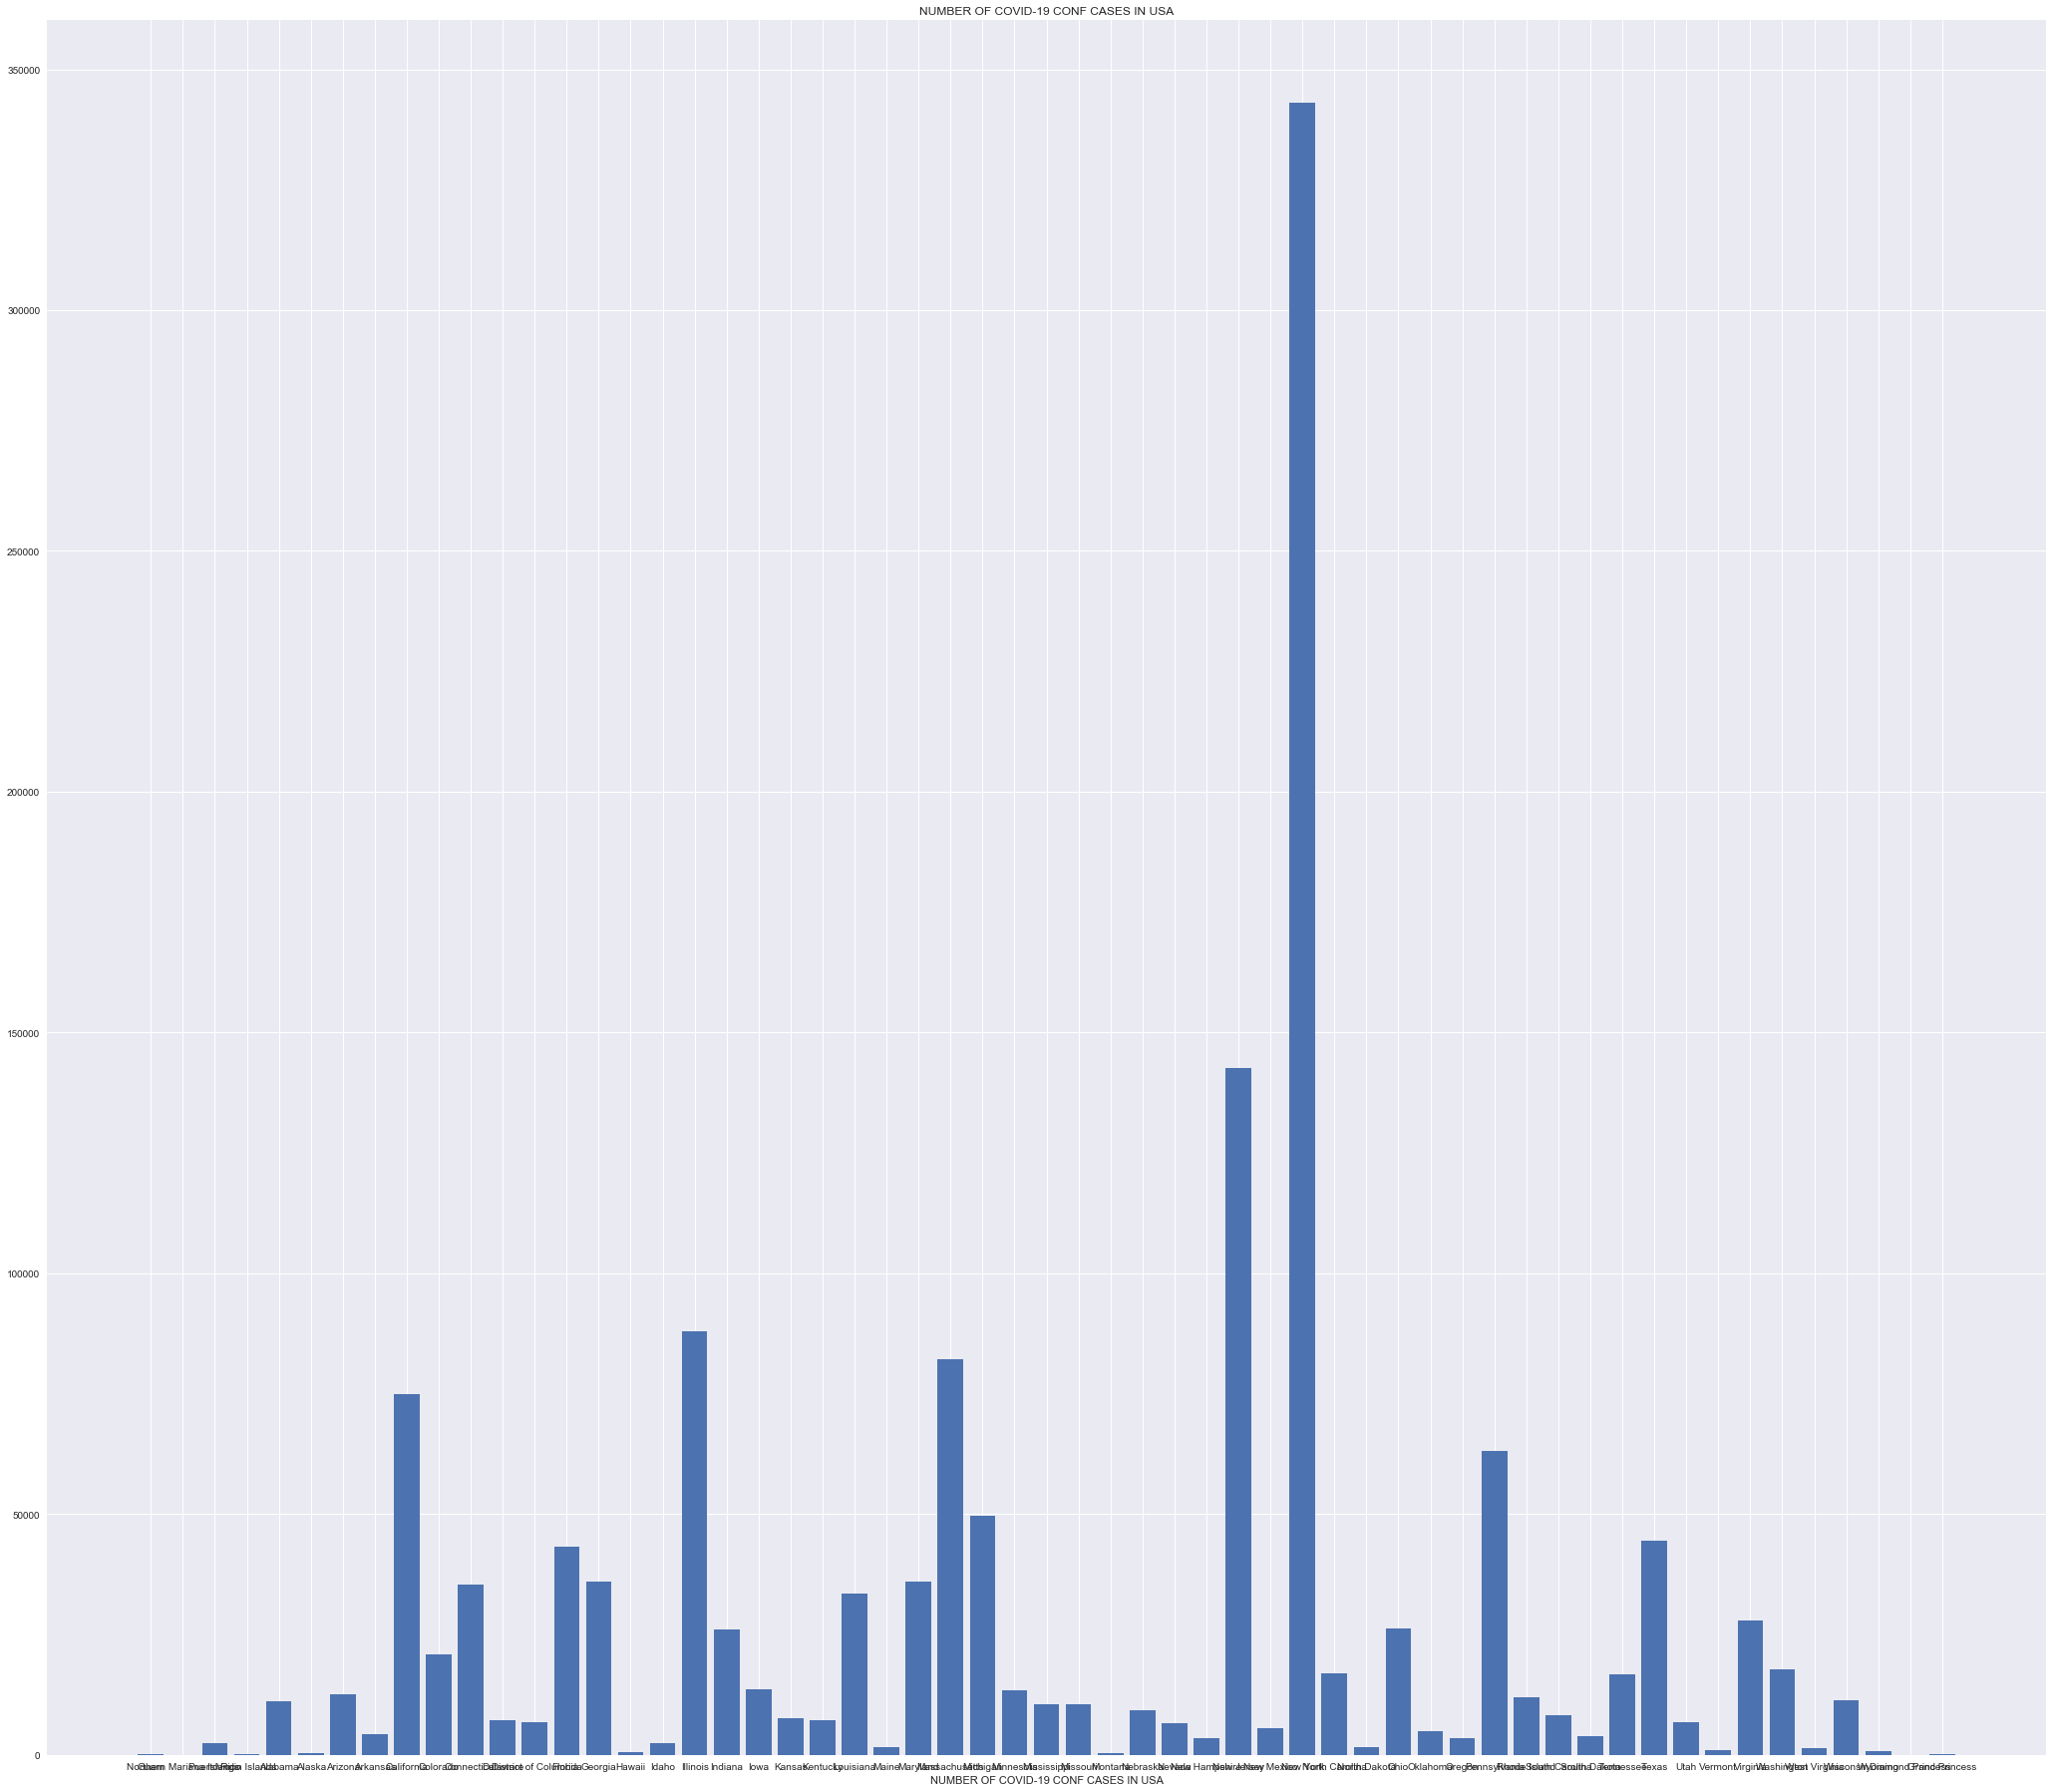

In [82]:
plt.figure(figsize=(32,32))
plt.bar(unique_prov,prov_conf_cases)
plt.title("NUMBER OF COVID-19 CONF CASES IN USA")
plt.xlabel("NUMBER OF COVID-19 CONF CASES IN USA")

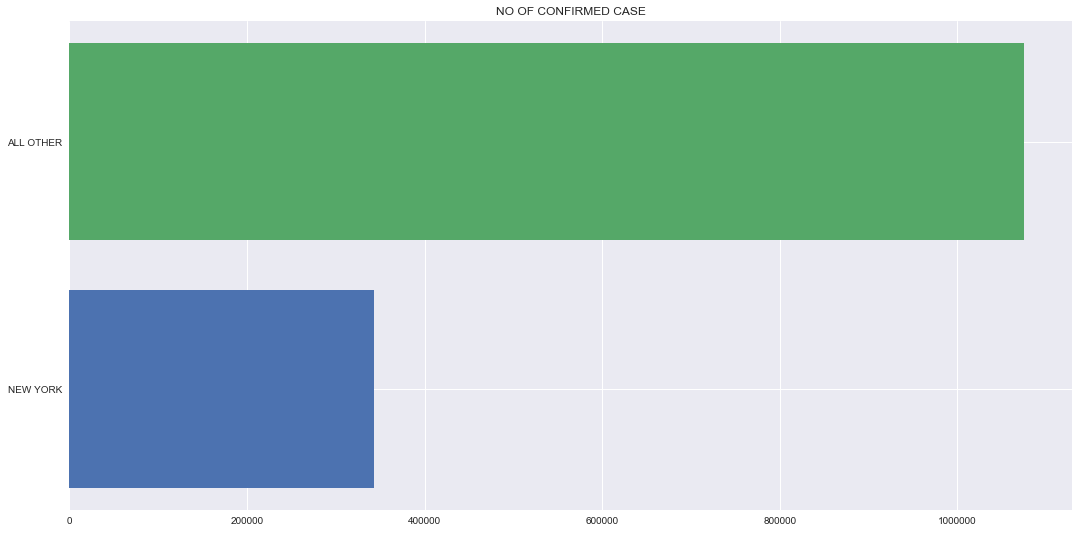

In [83]:
ny_conf=latest_conf[conf_case['Province_State']=="New York"].sum()
all_other=np.sum(prov_conf_cases)-ny_conf
plt.figure(figsize=(16,9))
plt.barh("NEW YORK",ny_conf)
plt.barh("ALL OTHER",all_other)
plt.title("NO OF CONFIRMED CASE")
plt.show()

In [84]:
print("--------------------------------------------------------")
print("| NEW YORK CASES:\t|\t\t",format(ny_conf),"\t|")
print("| ALL OTHER STATE:\t|\t\t",format(all_other),"\t|")
print("| TOTAL: \t\t|\t\t",format(ny_conf+all_other),"\t|")
print("--------------------------------------------------------")

--------------------------------------------------------
| NEW YORK CASES:	|		 343051 	|
| ALL OTHER STATE:	|		 1074723 	|
| TOTAL: 		|		 1417774 	|
--------------------------------------------------------


In [85]:
# less no of conf in the other and the top ten state with higher no of conf
vi_unique_state=[]
vi_conf_cases=[]
other=np.sum(prov_conf_cases[10:])
for i in range(len(prov_conf_cases[:10])):
    vi_unique_state.append(unique_prov[i])
    vi_conf_cases.append(prov_conf_cases[i])
    
vi_unique_state.append("Others")
vi_conf_cases.append("others")
     

In [86]:
print("\n\n",list(vi_unique_state))
print("\n\n",list(vi_conf_cases))



 ['Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Others']


 [152, 19, 2427, 69, 11101, 383, 12674, 4366, 74871, 20838, 'others']


In [87]:
#ploting

#  BUILDING THE ""SVM"" MODEL TO PREDICT THE UPCOMING TOTAL NO 

# OF CONFIRMED CASES IN NEXT 10 DAYS

In [88]:
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [89]:
#X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(date_since_1_22, usa_cases, test_size=0.15, shuffle=False)

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(d_sin, u_case, test_size=0.15, shuffle=False)

In [90]:
y_test_confirmed

array([[1180375],
       [1204351],
       [1229331],
       [1257023],
       [1283929],
       [1309550],
       [1329260],
       [1347881],
       [1369574],
       [1390406],
       [1417774]], dtype=int64)

In [91]:
kernel=['poly','sigmoid','rbf']#by default rbf is used
c=[0.01,0.1,1,10]
gamma=[0.01,0.1,1]
epsilon=[0.01,0.1,1]
shrinking=[True, False]

svm_grid={'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}


svm=SVR()
svm_search=RandomizedSearchCV(svm,svm_grid,scoring='neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
svm_search.fit(X_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.7min finished
E:\python\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
E:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [92]:
svm_search.best_params_

{'shrinking': False, 'kernel': 'poly', 'gamma': 1, 'epsilon': 1, 'C': 0.01}

In [93]:
svm_conf=svm_search.best_estimator_
svm_pred=svm_conf.predict(future_forecast)

In [94]:
svm_conf#to find the best estimator

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [95]:
list(svm_pred)# pred value now we have to test again the testing data

[-199025.7104023985,
 -199024.3529658227,
 -199014.85090979232,
 -198989.05961485323,
 -198938.83446154918,
 -198856.03083042905,
 -198732.50410203647,
 -198560.10965691519,
 -198330.70287560404,
 -198036.1391386838,
 -197668.273826643,
 -197218.96232008294,
 -196680.05999950238,
 -196043.42224545323,
 -195300.90443853207,
 -194444.36195924797,
 -193465.6501880429,
 -192356.62450580217,
 -191109.14029268094,
 -189715.05292928137,
 -188166.21779635467,
 -186454.4902744434,
 -184571.7257438741,
 -182509.77958488383,
 -180260.50717922964,
 -177815.76390626945,
 -175167.40514683642,
 -172307.28628244915,
 -169227.2626914672,
 -165919.189756333,
 -162374.92285719432,
 -158586.31737473526,
 -154545.22868755378,
 -150243.51217934408,
 -145673.023229628,
 -140825.61721697368,
 -135693.1495246581,
 -130267.475531011,
 -124540.45061746158,
 -118503.93016472377,
 -112149.76955404796,
 -105469.82416596927,
 -98455.94937875785,
 -91100.00057497539,
 -83393.83313420333,
 -75329.30243673839,
 -66898.

MAE: 213582.9823599765
MSE: 51471081173.26982


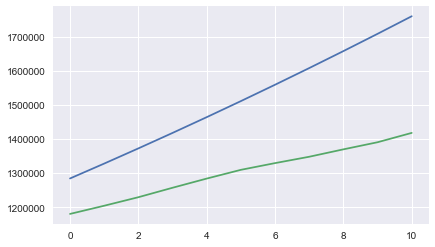

In [96]:
#check against testing data

svm_test_pred=svm_conf.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)

print("MAE:",mean_absolute_error(svm_test_pred,y_test_confirmed))
print("MSE:",mean_squared_error(svm_test_pred,y_test_confirmed))

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000., 1600000.]),
 <a list of 10 Text yticklabel objects>)

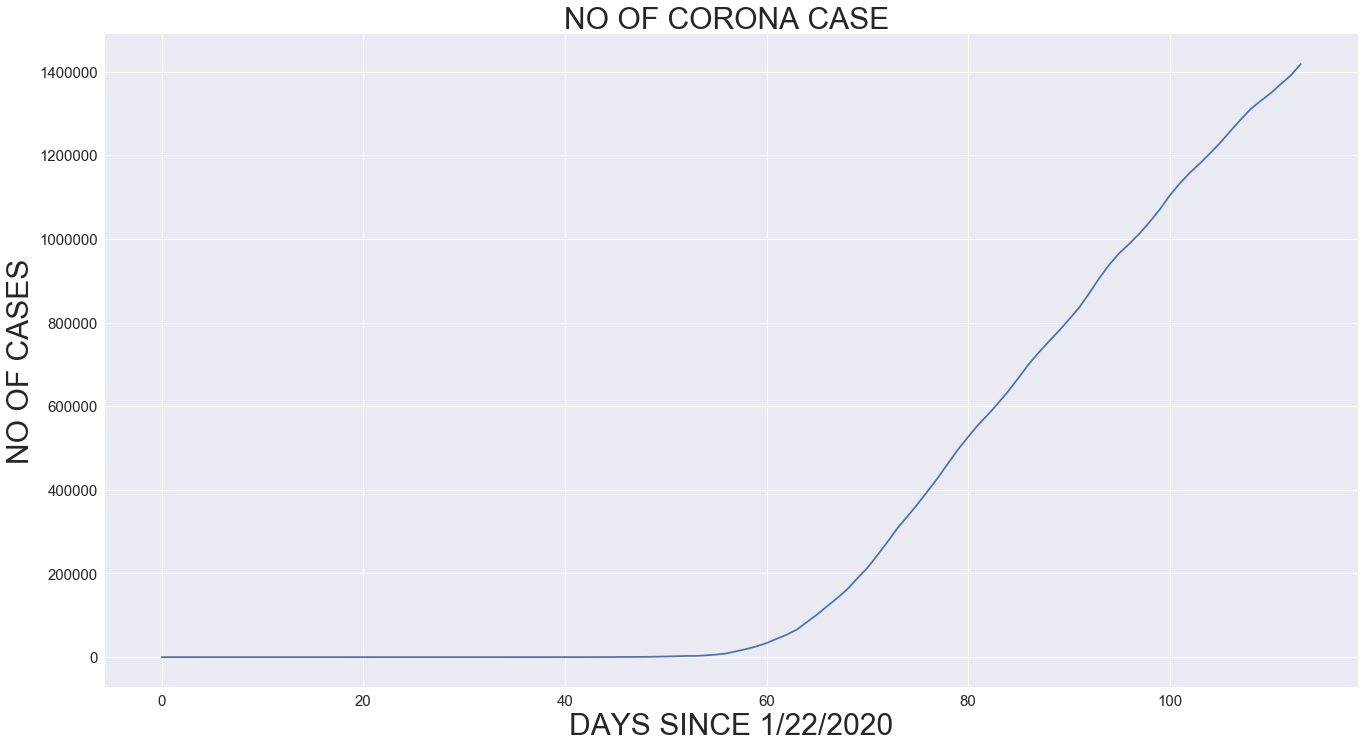

In [97]:
#total no of coro cases time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,usa_cases)
plt.title("NO OF CORONA CASE ",size=30)
plt.xlabel("DAYS SINCE 1/22/2020",size=30)
plt.ylabel("NO OF CASES",size=30)
plt.xticks(size=15)
plt.yticks(size=15)
#plt.legend(['Confirmed cases','SVM_prediction'])

# y axis total no of CASES

# x axis total no of days

# after the 62 days the rate of confirmed cases went HIGH


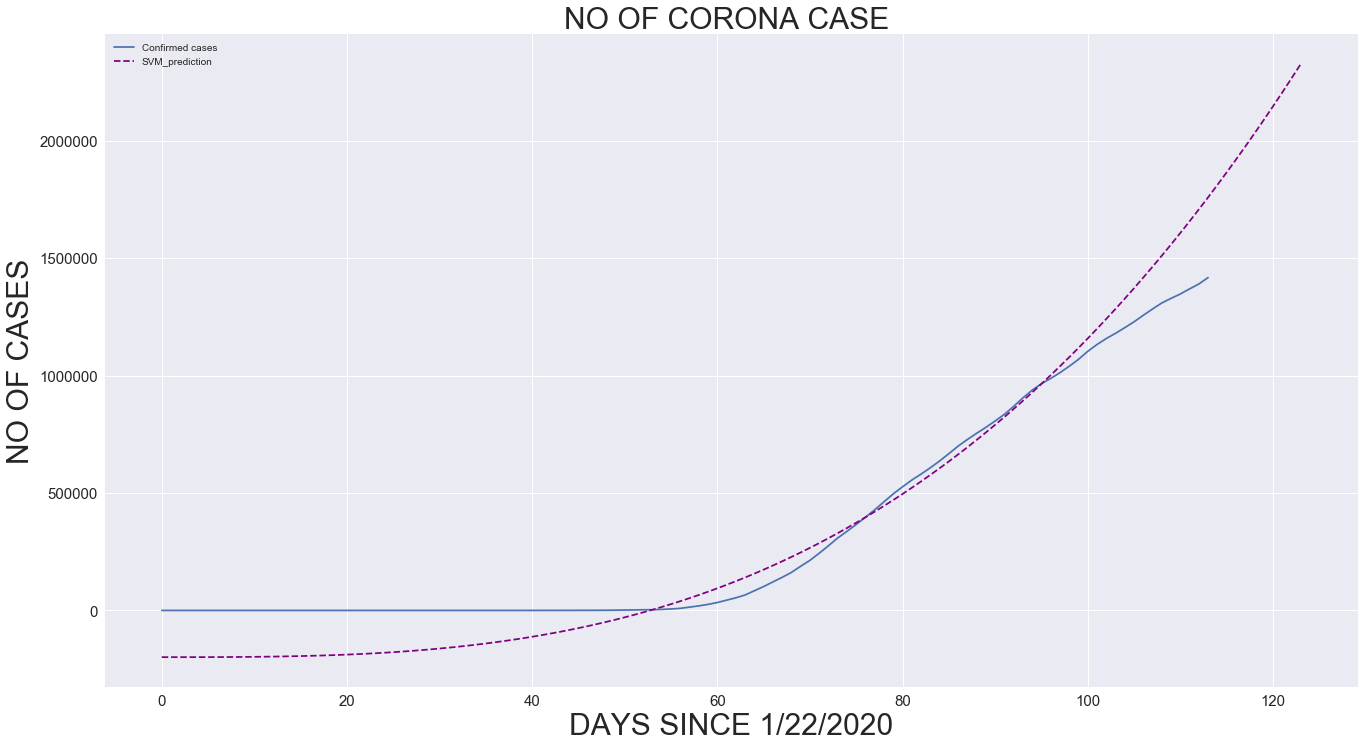

In [98]:
#total no of coFIRMED CASES VS THE PREDICTED cases time

plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,usa_cases)
plt.plot(future_forecast,svm_pred,linestyle="dashed",color='purple')
plt.title("NO OF CORONA CASE ",size=30)
plt.xlabel("DAYS SINCE 1/22/2020",size=30)
plt.ylabel("NO OF CASES",size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(['Confirmed cases','SVM_prediction'])

In [99]:
print("SVM FUTURE PREDTICTION:")
set(zip(future_forecast_dates[-10:],svm_pred[-10:]))

SVM FUTURE PREDTICTION:


{('05/15/2020', 1812076.3037939975),
 ('05/16/2020', 1865465.6417399356),
 ('05/17/2020', 1919791.610945792),
 ('05/18/2020', 1975062.3559847781),
 ('05/19/2020', 2031286.0215273807),
 ('05/20/2020', 2088470.7521792362),
 ('05/21/2020', 2146624.692490668),
 ('05/22/2020', 2205755.987187476),
 ('05/23/2020', 2265872.7808314273),
 ('05/24/2020', 2326983.2179995487)}

#  BUILDING THE LINEAR MODEL TO PREDICT THE UPCOMING TOTAL NO 

# OF CONFIRMED CASES IN NEXT 10 DAYS

In [100]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression(normalize=True,fit_intercept=True)
linear_model.fit(X_train_confirmed,y_train_confirmed)
test_linear_pred=linear_model.predict(X_test_confirmed)
linear_pred=linear_model.predict(future_forecast)

print("MAE:",mean_absolute_error(svm_test_pred,y_test_confirmed))
print("MSE:",mean_squared_error(svm_test_pred,y_test_confirmed))

MAE: 213582.9823599765
MSE: 51471081173.26982


In [101]:
linear_pred

array([[-1133970.22665257],
       [-1112761.667266  ],
       [-1091553.10787943],
       [-1070344.54849286],
       [-1049135.98910629],
       [-1027927.42971973],
       [-1006718.87033316],
       [ -985510.31094659],
       [ -964301.75156002],
       [ -943093.19217345],
       [ -921884.63278689],
       [ -900676.07340032],
       [ -879467.51401375],
       [ -858258.95462718],
       [ -837050.39524061],
       [ -815841.83585405],
       [ -794633.27646748],
       [ -773424.71708091],
       [ -752216.15769434],
       [ -731007.59830777],
       [ -709799.03892121],
       [ -688590.47953464],
       [ -667381.92014807],
       [ -646173.3607615 ],
       [ -624964.80137493],
       [ -603756.24198837],
       [ -582547.6826018 ],
       [ -561339.12321523],
       [ -540130.56382866],
       [ -518922.00444209],
       [ -497713.44505553],
       [ -476504.88566896],
       [ -455296.32628239],
       [ -434087.76689582],
       [ -412879.20750925],
       [ -391670.648

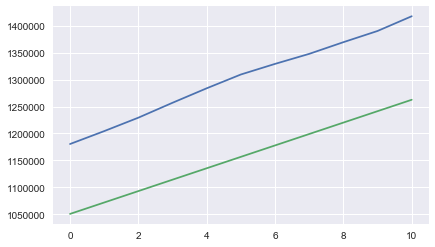

In [102]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

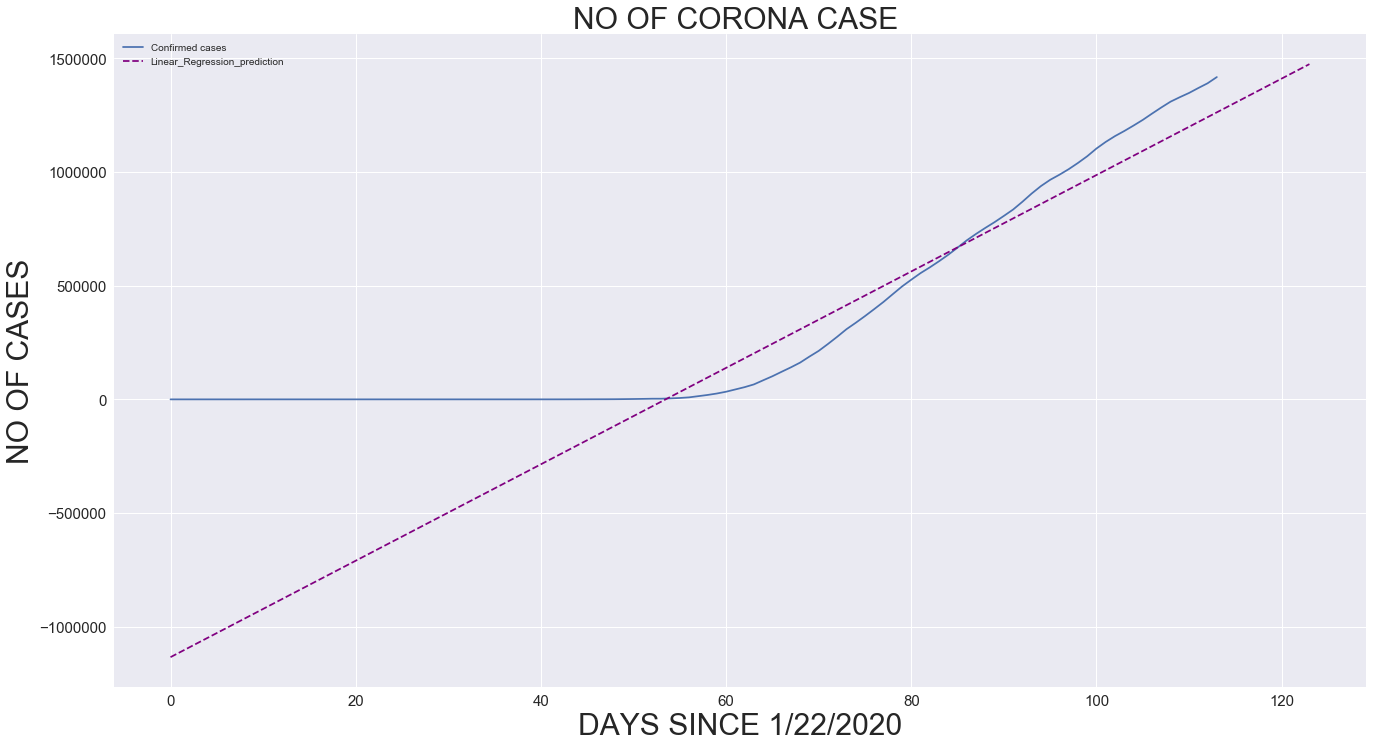

In [103]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,usa_cases)
plt.plot(future_forecast,linear_pred,linestyle="dashed",color='purple')
plt.title("NO OF CORONA CASE ",size=30)
plt.xlabel("DAYS SINCE 1/22/2020",size=30)
plt.ylabel("NO OF CASES",size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(['Confirmed cases','Linear_Regression_prediction'])

In [104]:
linear_pred[-10:]#normalize=True,fit_intercept=Tru

array([[1283805.54341618],
       [1305014.10280275],
       [1326222.66218932],
       [1347431.22157589],
       [1368639.78096245],
       [1389848.34034902],
       [1411056.89973559],
       [1432265.45912216],
       [1453474.01850873],
       [1474682.57789529]])

#  BUILDING THE LOGISTIC MODEL TO PREDICT THE UPCOMING TOTAL  

# NO OF CONFIRMED CASES IN NEXT 10 DAYS

In [105]:
from sklearn.linear_model import LogisticRegression
logi_model=LogisticRegression()
logi_model.fit(X_train_confirmed,y_train_confirmed)
test_logi_pred=logi_model.predict(X_test_confirmed)
logi_pred=logi_model.predict(future_forecast)
print("MAE:",mean_absolute_error(svm_test_pred,y_test_confirmed))
print("MSE:",mean_squared_error(svm_test_pred,y_test_confirmed))

E:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\python\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\python\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


MAE: 213582.9823599765
MSE: 51471081173.26982


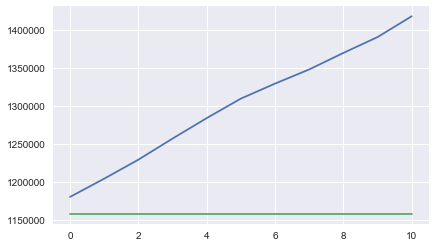

In [106]:
plt.plot(y_test_confirmed)
plt.plot(test_logi_pred)

In [107]:
logi_pred

array([    104,     104,     104,     104,     104,     104,     104,
           104,     104,     104,     104,     104,     104,     104,
           104,     104,     104,     104,     104,     104,     104,
           104,     104,     104,     217,     514,    1557,    4307,
          8873,   43663,  101657,  188172,  336802,  462780,  607670,
        754376,  938154, 1069424, 1158040, 1158040, 1158040, 1158040,
       1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040,
       1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040,
       1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040,
       1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040,
       1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040,
       1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040,
       1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040,
       1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040,
       1158040, 1158

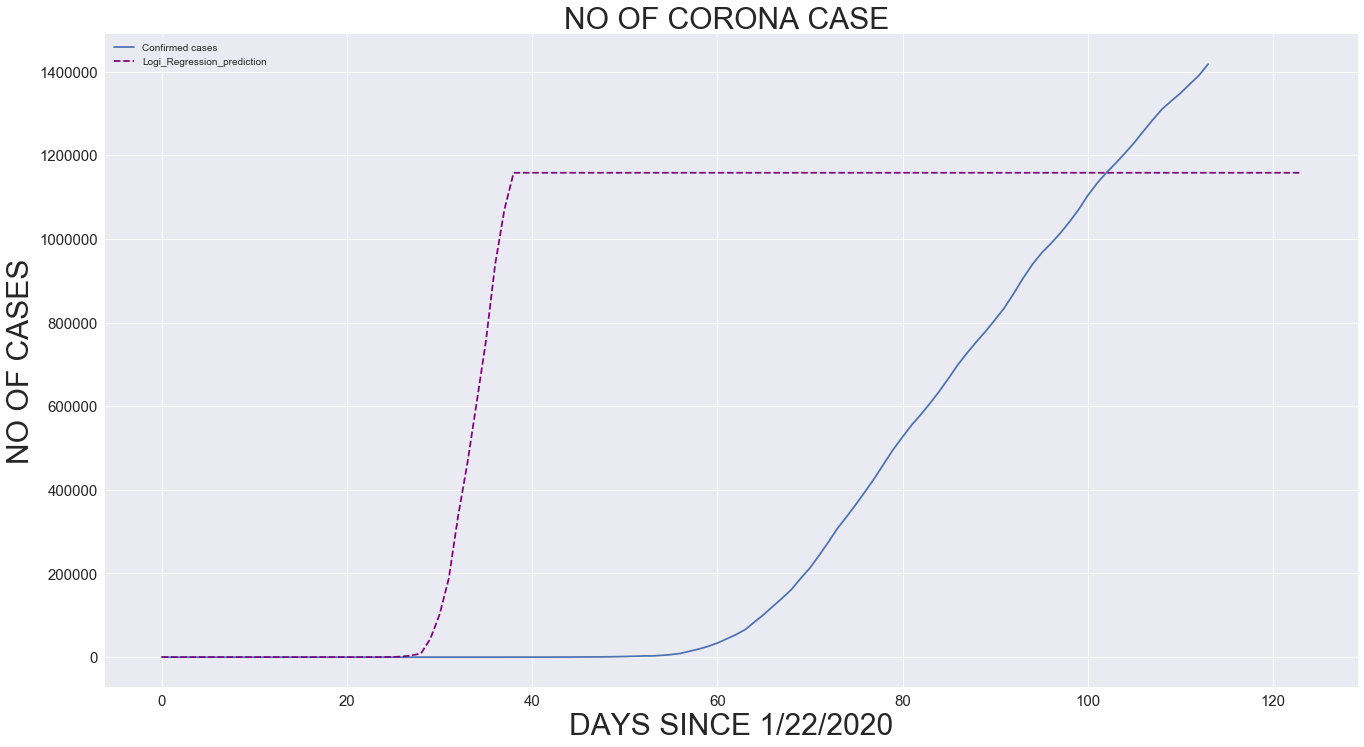

In [108]:
plt.figure(figsize=(20,12))
plt.plot(adjusted_dates,usa_cases)
plt.plot(future_forecast,logi_pred,linestyle="dashed",color='purple')
plt.title("NO OF CORONA CASE ",size=30)
plt.xlabel("DAYS SINCE 1/22/2020",size=30)
plt.ylabel("NO OF CASES",size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(['Confirmed cases','Logi_Regression_prediction'])

#  "INTERESTING THING" the death should be increasesd from the 30 days from the first case bt till that time the situation is  under control .
# But After  next 32 days the situtation was out of control and the confrimed cases start Increasing and it went on increasing the plot should be flatten bt the it went on increasing 

In [109]:

print("==================================================================================")

print(list(logi_pred[-10:]))

print("==================================================================================")

[1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040, 1158040]


# HERE WE HAVE FULL COUNTRY DATA USING IT WE JUST PREDTICED WHEN THE CURE IS GOING TO BE FLATTEN OF ONLY USA

# ALMOST AFTER MORE 88 DAYS  USA IS IN DANGER ZONE

In [110]:

#SO NOW WILL TAKE THE FULL DATA OF COUTRY AND SELECT THE USA AND PREDTIC THE FUTURE
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

train=pd.read_csv("D:\\RStudio\\mini COVID\\MODEL FOR COVID\\DATA SET UPDATED\\cleaned/covid-19-all.csv")

In [111]:
train.tail(5)

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
178465,West Bank and Gaza,NaN,31.952200,35.233200,375.0,315.0,2.0,2020-05-15
178466,Western Sahara,NaN,24.215500,-12.885800,6.0,6.0,0.0,2020-05-15
178467,Yemen,NaN,15.552727,48.516388,106.0,1.0,15.0,2020-05-15
178468,Zambia,NaN,-13.133897,27.849332,654.0,124.0,7.0,2020-05-15
178469,Zimbabwe,NaN,-19.015438,29.154857,42.0,13.0,4.0,2020-05-15


In [112]:
train.head(5)

,Country/Region,Province/State,Latitude,Longitude,Confirmed,Recovered,Deaths,Date
0,China,Anhui,31.8257,117.2264,1.0,NaN,NaN,2020-01-22
1,China,Beijing,40.1824,116.4142,14.0,NaN,NaN,2020-01-22
2,China,Chongqing,30.0572,107.8740,6.0,NaN,NaN,2020-01-22
3,China,Fujian,26.0789,117.9874,1.0,NaN,NaN,2020-01-22
4,China,Gansu,37.8099,101.0583,NaN,NaN,NaN,2020-01-22


In [113]:
usa_df=train[train['Country/Region']=='US'].groupby('Date')['Confirmed','Deaths'].sum()

In [114]:
usa_df

,Confirmed,Deaths
Date,,
2020-01-22,1.0,0.0
2020-01-23,1.0,0.0
2020-01-24,2.0,0.0
2020-01-25,2.0,0.0
2020-01-26,5.0,0.0
...,...,...
2020-05-11,1347881.0,80682.0
2020-05-12,1369574.0,82376.0
2020-05-13,1390406.0,84119.0


In [115]:
usa_df['day_count']=list(range(1,len(usa_df)+1))#counting the date same full 115 as data is update now 115

In [116]:
usa_df['day_count']

Date
2020-01-22      1
2020-01-23      2
2020-01-24      3
2020-01-25      4
2020-01-26      5
             ... 
2020-05-11    111
2020-05-12    112
2020-05-13    113
2020-05-14    114
2020-05-15    115
Name: day_count, Length: 115, dtype: int64

In [117]:
xdata=usa_df.day_count
ydata=usa_df.Confirmed

In [118]:
usa_df['rate'] = (usa_df.Confirmed - usa_df.Confirmed.shift(1))/usa_df.Confirmed

In [119]:
usa_df['rate']

Date
2020-01-22         NaN
2020-01-23    0.000000
2020-01-24    0.500000
2020-01-25    0.000000
2020-01-26    0.600000
                ...   
2020-05-11    0.013815
2020-05-12    0.015839
2020-05-13    0.014983
2020-05-14    0.019303
2020-05-15    0.017362
Name: rate, Length: 115, dtype: float64

In [120]:
usa_df['increase'] = (usa_df.Confirmed-usa_df.Confirmed.shift(1))



In [121]:
usa_df['increase']

Date
2020-01-22        NaN
2020-01-23        0.0
2020-01-24        1.0
2020-01-25        0.0
2020-01-26        3.0
               ...   
2020-05-11    18621.0
2020-05-12    21693.0
2020-05-13    20832.0
2020-05-14    27368.0
2020-05-15    25050.0
Name: increase, Length: 115, dtype: float64

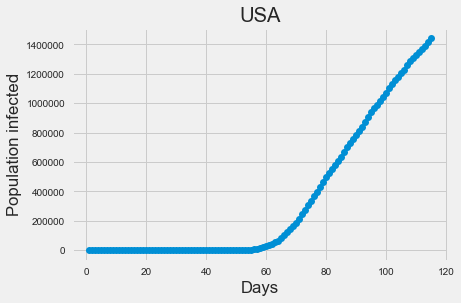

In [122]:
plt.plot(xdata, ydata, 'o')
plt.title("USA")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()



**Sigmoid function,

Here is a snap of how I learnt to fit Sigmoid Function - y = c/(1+np.exp(-a*(x-b))) and 3 coefficients [c, a, b]:

    c - the maximum value (eventual maximum infected people, the sigmoid scales to this value eventually)
    a - the sigmoidal shape (how the infection progress. The smaller, the softer the sigmoidal shape is)
    b - the point where sigmoid start to flatten from steepening (the midpoint of sigmoid, when the rate of increase start to slow down)



In [123]:
us_df = train[train['Country/Region']=='US'].groupby('Date')['Confirmed','Deaths','Recovered'].sum()
us_df = us_df[us_df.Confirmed>=100]

In [124]:
us_df

,Confirmed,Deaths,Recovered
Date,,,
2020-03-02,101.0,6.0,7.0
2020-03-03,122.0,7.0,8.0
2020-03-04,153.0,11.0,8.0
2020-03-05,221.0,12.0,8.0
2020-03-06,278.0,14.0,8.0
...,...,...,...
2020-05-11,1347881.0,80682.0,232733.0
2020-05-12,1369574.0,82376.0,230287.0
2020-05-13,1390406.0,84119.0,243430.0


In [125]:
from scipy.optimize import curve_fit
import pylab
from datetime import timedelta

In [126]:
us_df['day_count'] = list(range(1,len(us_df)+1))
us_df['increase'] = (us_df.Confirmed-us_df.Confirmed.shift(1))
us_df['rate'] = (us_df.Confirmed-us_df.Confirmed.shift(1))/us_df.Confirmed
us_df['Active']=us_df['Confirmed']-us_df['Deaths']-us_df['Recovered']

In [127]:
us_df['Active']

Date
2020-03-02         88.0
2020-03-03        107.0
2020-03-04        134.0
2020-03-05        201.0
2020-03-06        256.0
                ...    
2020-05-11    1034466.0
2020-05-12    1056911.0
2020-05-13    1062857.0
2020-05-14    1085462.0
2020-05-15    1104547.0
Name: Active, Length: 75, dtype: float64

In [128]:
us_df['day_count']

Date
2020-03-02     1
2020-03-03     2
2020-03-04     3
2020-03-05     4
2020-03-06     5
              ..
2020-05-11    71
2020-05-12    72
2020-05-13    73
2020-05-14    74
2020-05-15    75
Name: day_count, Length: 75, dtype: int64

In [129]:
us_df['increase']

Date
2020-03-02        NaN
2020-03-03       21.0
2020-03-04       31.0
2020-03-05       68.0
2020-03-06       57.0
               ...   
2020-05-11    18621.0
2020-05-12    21693.0
2020-05-13    20832.0
2020-05-14    27368.0
2020-05-15    25050.0
Name: increase, Length: 75, dtype: float64

In [130]:
def sigmoid(x,c,a,b):
     y = c*1 / (1 + np.exp(-a*(x-b)))
     return y


In [131]:
xdata = np.array(list(us_df.day_count)[::2])
ydata = np.array(list(us_df.Active)[::2])

In [132]:
population=1.332*10**9
popt, pcov = curve_fit(sigmoid, xdata, ydata, method='dogbox',bounds=([0.,0., 0.],[population,6, 100.]))
print(popt)

[1.08258415e+06 1.06501927e-01 4.49752054e+01]


In [133]:
est_a = popt[0]
est_b = popt[1]
est_c = popt[2]


In [134]:
est_a

1082584.1484809602

In [135]:
est_b

0.10650192706551263

In [136]:
est_c

44.97520542443669

In [137]:
x = np.linspace(-1, us_df.day_count.max()+50, 50)
y = sigmoid(x,est_a,est_b,est_c)


In [138]:
x

array([ -1.        ,   1.57142857,   4.14285714,   6.71428571,
         9.28571429,  11.85714286,  14.42857143,  17.        ,
        19.57142857,  22.14285714,  24.71428571,  27.28571429,
        29.85714286,  32.42857143,  35.        ,  37.57142857,
        40.14285714,  42.71428571,  45.28571429,  47.85714286,
        50.42857143,  53.        ,  55.57142857,  58.14285714,
        60.71428571,  63.28571429,  65.85714286,  68.42857143,
        71.        ,  73.57142857,  76.14285714,  78.71428571,
        81.28571429,  83.85714286,  86.42857143,  89.        ,
        91.57142857,  94.14285714,  96.71428571,  99.28571429,
       101.85714286, 104.42857143, 107.        , 109.57142857,
       112.14285714, 114.71428571, 117.28571429, 119.85714286,
       122.42857143, 125.        ])

In [139]:
y

array([   8030.22800586,   10535.39919613,   13812.05707452,
         18090.60492598,   23665.16782188,   30907.6387371 ,
         40282.27323031,   52358.77667871,   67820.20165874,
         87459.74790915,  112157.97171287,  142829.78797563,
        180330.74226341,  225317.10650328,  278067.32845716,
        338293.79091545,  404998.04259519,  476435.65806197,
        550241.46683849,  623715.91124709,  694207.17462688,
        759479.27700635,  817963.05122101,  868840.17604025,
        911975.72761171,  947756.99001656,  976903.54753859,
       1000296.34472448, 1018848.88770763, 1033424.15660309,
       1044789.92965493, 1053601.63586708, 1060402.51382845,
       1065633.20999474, 1069645.495362  , 1072716.8670644 ,
       1075064.28353653, 1076856.23386362, 1078222.90268781,
       1079264.49232906, 1080057.90355481, 1080662.02401398,
       1081121.87207552, 1081471.81956265, 1081738.0842344 ,
       1081940.64950115, 1082094.73839857, 1082211.94266846,
       1082301.08611985,

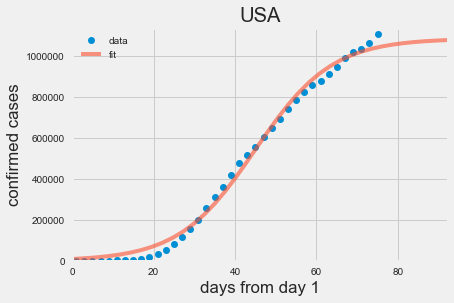

In [140]:
pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit',alpha = 0.6)
pylab.ylim(-0.05, est_a*1.05)
pylab.xlim(-0.05, est_c*2.05)
pylab.legend(loc='best')
plt.xlabel('days from day 1')
plt.ylabel('confirmed cases')
plt.title('USA')
pylab.show()


In [141]:
print('model start date:',us_df[us_df.day_count==1].index[0])
print('model start infection:',int(us_df[us_df.day_count==1].Confirmed[0]))


model start date: 2020-03-02
model start infection: 101


In [142]:
print('model fitted max Active at:',int(est_a))
print('model sigmoidal coefficient is:',round(est_b,3))
print('model curve stop steepening, start flattening by day:',int(est_c))


model fitted max Active at: 1082584
model sigmoidal coefficient is: 0.107
model curve stop steepening, start flattening by day: 44


In [143]:
print('model curve flattens by day:',int(est_c)*2)
display(us_df.head(3))
display(us_df.tail(3))

model curve flattens by day: 88


,Confirmed,Deaths,Recovered,day_count,increase,rate,Active
Date,,,,,,,
2020-03-02,101.0,6.0,7.0,1,NaN,NaN,88.0
2020-03-03,122.0,7.0,8.0,2,21.0,0.172131,107.0
2020-03-04,153.0,11.0,8.0,3,31.0,0.202614,134.0


,Confirmed,Deaths,Recovered,day_count,increase,rate,Active
Date,,,,,,,
2020-05-13,1390406.0,84119.0,243430.0,73,20832.0,0.014983,1062857.0
2020-05-14,1417774.0,85898.0,246414.0,74,27368.0,0.019303,1085462.0
2020-05-15,1442824.0,87530.0,250747.0,75,25050.0,0.017362,1104547.0
